In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sympy import Point,Line

In [2]:
data = pd.read_csv('~/DataSet3/1.csv')

In [3]:
data1=data.iloc[:,1:4]
labels = data.iloc[:,-1]
data1.head()

,1502,2215,2153
0,1667,2072,2047
1,1611,1957,1906
2,1601,1939,1831
3,1643,1965,1879
4,1604,1959,1921


**Scalling data to normalize the effect of each dimention and also reduce effect of outliers**

In [4]:
scaler = StandardScaler()
sample=scaler.fit_transform(data1)
print(scaler.mean_)

[1910.67337231 2380.28738462 2041.21414154]


**Elbow implementation with Avg Cluster Distance as validation matrix**

In [5]:
cluster_seperation={}
K = range(2,11)
for k in K :
    cluster_seperation[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    #print("Centers = "+str(centers))
    #print("pdist = "+str(pdist(centers)))
    pair_dist=pdist(centers)
    avg_dist=pair_dist.sum()/len(pair_dist)
    print("Avg dist = "+str(avg_dist))
    cluster_seperation[k]=avg_dist
print("Clsuter seperation ="+str(cluster_seperation))

Avg dist = 2.445853002760117
Avg dist = 3.4170168845123574
Avg dist = 3.3626432612173347
Avg dist = 3.0603109212126265
Avg dist = 2.8072357521654725
Avg dist = 5.020584217881632
Avg dist = 4.945010538963059
Avg dist = 4.625456818305149
Avg dist = 4.584722967369187
Clsuter seperation ={2: 2.445853002760117, 3: 3.4170168845123574, 4: 3.3626432612173347, 5: 3.0603109212126265, 6: 2.8072357521654725, 7: 5.020584217881632, 8: 4.945010538963059, 9: 4.625456818305149, 10: 4.584722967369187}


In [6]:
SSE_array=[]
slope=[]
for key,value in cluster_seperation.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+2,s])
slope

[2.445853002760117, 3.4170168845123574, 3.3626432612173347, 3.0603109212126265, 2.8072357521654725, 5.020584217881632, 4.945010538963059, 4.625456818305149, 4.584722967369187]


[[3, 0.9711638817522403],
 [4, -0.05437362329502271],
 [5, -0.3023323400047082],
 [6, -0.253075169047154],
 [7, 2.2133484657161597],
 [8, -0.07557367891857325],
 [9, -0.3195537206579102],
 [10, -0.040733850935962046]]

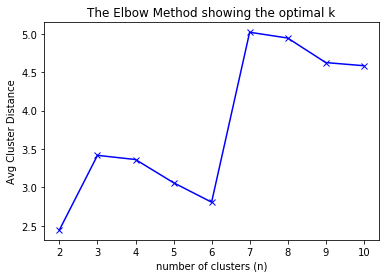

In [7]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('number of clusters (n)')
plt.ylabel('Avg Cluster Distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    # changed based on concavity of the graph
    if change_slope < 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 4
Optimal Number of Clusters = 5
Optimal Number of Clusters = 8


In [11]:
distances=[]
for i in range(0,9):
    p1=Point(2,SSE_array[0])
    p2=Point(10,SSE_array[8])
    l1 = Line(p1,p2)
    p=Point(i+2,SSE_array[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+2))

Optimal number 0f clusters = 7
